<ipython-input-13-b6b46e6edecd>:34: RuntimeWarning: invalid value encountered in power
  R = y**(1./3)


Text(0, 0.5, 'Non dimensional Degradation Radius')

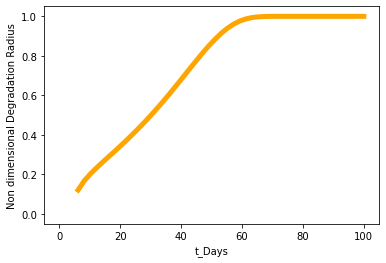

In [13]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#equation
#dy/dt = 1/2 *[ A *(1-y)/B*c +1 - y]*tanh(alpha*(t - ti)+ 1)


#y = (mass of soluble product / mass of a single microspore)
#R = y**(-1./3) = non dimensional degradation radius
V_MS= 1.793 *10**-15 #Volume of a microsphere = 4/3 * pi * R^3 (R = 12.15 um)(Experimental Studies and Modeling of the Degradation Process of Poly(Lactic-co-Glycolic Acid) Microspheres for Sustained Protein Release)
MW_s =  148.11 #g/mol (Molecular weight of soluble product (Lactic Acid and Glycolic Acid)(https://pubchem.ncbi.nlm.nih.gov/compound/Poly_lactic-acid-co-glycolic-acid)
k2 = k1 = 15.84 #day^-1 #(Forward Rate of ester hydrolysis )(https://www.toppr.com/ask/question/the-rate-constant-for-forward-and-backward-reactions-of-hydrolysis-of-ester-are-11-times/)
initial_Acid =  0.029 #mol/L #(carbonic acid in blood conc.) (https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=bicarbonate)
m_MS_0 = 7*10**-20 #g #(Experimental Studies and Modeling of the Degradation Process of Poly(Lactic-co-Glycolic Acid) Microspheres for Sustained Protein Release)
MW_P_0 = 41.9* 10**3 #g/mol #(Experimental Studies and Modeling of the Degradation Process of Poly(Lactic-co-Glycolic Acid) Microspheres for Sustained Protein Release)
K_m = 1.136 #(Experimental Studies and Modeling of the Degradation Process of Poly(Lactic-co-Glycolic Acid) Microspheres for Sustained Protein Release)
Kdeg =0.1 #day^-1 #(Experimental Studies and Modeling of the Degradation Process of Poly(Lactic-co-Glycolic Acid) Microspheres for Sustained Protein Release) 
alpha = 2.5
ti = 3

A = (V_MS * MW_s * k2 * initial_Acid)/m_MS_0
B = (K_m * V_MS * MW_P_0)/m_MS_0


def model(y,t):
    c = math.exp(-Kdeg*t)
    dydt = 0.5 * ((A*(1 - y)/(B*c + 1 - y))*np.tanh(alpha*(t-ti)+1))
    return dydt
y0 = 0
t = np.linspace(0,100)
y = odeint(model,y0,t)
R = y**(1./3)
plt.plot(t,R,linewidth = 5,color = 'orange')
plt.xlabel('t_Days')
plt.ylabel('Non dimensional Degradation Radius')